In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
df = pd.read_csv("data/accidents.csv")

# Get rid of values after 2020
df = df[df.JAHR < 2021].reset_index().drop("index", axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1911 entries, 0 to 1910
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MONATSZAHL                      1911 non-null   object 
 1   AUSPRAEGUNG                     1911 non-null   object 
 2   JAHR                            1911 non-null   int64  
 3   MONAT                           1911 non-null   object 
 4   WERT                            1911 non-null   float64
 5   VORJAHRESWERT                   1820 non-null   float64
 6   VERAEND_VORMONAT_PROZENT        1756 non-null   float64
 7   VERAEND_VORJAHRESMONAT_PROZENT  1819 non-null   float64
 8   ZWOELF_MONATE_MITTELWERT        1764 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 134.5+ KB


# Missing Value Analysis

There are no unexplained missing values.

In [136]:
# Check each column for nulls

na_cols = {}
for col in df.columns:
    empty_rows = df[df[col].isna()]
    if (empty_rows.size >0):
        na_cols[col] = empty_rows.size
        
print(na_cols)

{'VORJAHRESWERT': 819, 'VERAEND_VORMONAT_PROZENT': 1395, 'VERAEND_VORJAHRESMONAT_PROZENT': 828, 'ZWOELF_MONATE_MITTELWERT': 1323}


In [137]:
# Analyse NA values

# VORJAHRESWERT
print(df[df.VORJAHRESWERT.isna()].JAHR.unique()) # all values from 2000
print(df.JAHR.min()) # because 2000 is the first year on record

# VERAEND_VORMONAT_PROZENT
print("---------------------------------------------------------------------------------")
print(df[df.VERAEND_VORMONAT_PROZENT.isna()].MONAT.unique())
# Logical for yearly sum
# Jan. 2020 first month on record
# 2013/02 had no injured
print(df[((df.MONAT == "201303") | (df.MONAT == "201302")) & (df.AUSPRAEGUNG == "Verletzte und Getötete")& (df.MONATSZAHL == "Alkoholunfälle")])

# VERAEND_VORJAHRESMONAT_PROZENT
print("---------------------------------------------------------------------------------")
print(df[df.VERAEND_VORJAHRESMONAT_PROZENT.isna()].MONAT.unique())
# 2020 first year on record
# 2013/02 had no injured

# ZWOELF_MONATE_MITTELWERT
print("---------------------------------------------------------------------------------")
df[df.ZWOELF_MONATE_MITTELWERT.isna()].MONAT.unique() # Only for sum rows

[2000]
2000
---------------------------------------------------------------------------------
['Summe' '200001' '201303']
         MONATSZAHL             AUSPRAEGUNG  JAHR   MONAT  WERT  \
366  Alkoholunfälle  Verletzte und Getötete  2013  201302   0.0   
367  Alkoholunfälle  Verletzte und Getötete  2013  201303   8.0   

     VORJAHRESWERT  VERAEND_VORMONAT_PROZENT  VERAEND_VORJAHRESMONAT_PROZENT  \
366            5.0                    -100.0                          -100.0   
367            5.0                       NaN                            60.0   

     ZWOELF_MONATE_MITTELWERT  
366                      17.0  
367                      18.0  
---------------------------------------------------------------------------------
['Summe' '200001' '200002' '200003' '200004' '200005' '200006' '200007'
 '200008' '200009' '200010' '200011' '200012' '201402']
---------------------------------------------------------------------------------


array(['Summe'], dtype=object)

# Tidy Data

In [144]:
def convert_months(digits):
    months = {
        "01": "January",
        "02": "February",
        "03": "March",
        "04": "April",
        "05": "May",
        "06": "June",
        "07": "July",
        "08": "August",
        "09": "September",
        "10": "October",
        "11": "November",
        "12": "December"
    }
    
    if(digits != "Summe"):
        return months[digits[-2:]]
    return digits

df["MONAT"] = df["MONAT"].apply(convert_months)

df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2020,Summe,430.0,434.0,NaN,-0.92,NaN
1,Alkoholunfälle,insgesamt,2020,January,28.0,22.0,-20.00,27.27,37.0
2,Alkoholunfälle,insgesamt,2020,February,40.0,28.0,42.86,42.86,38.0
3,Alkoholunfälle,insgesamt,2020,March,27.0,34.0,-32.50,-20.59,37.0
4,Alkoholunfälle,insgesamt,2020,April,26.0,36.0,-3.70,-27.78,36.0


# Visualisation

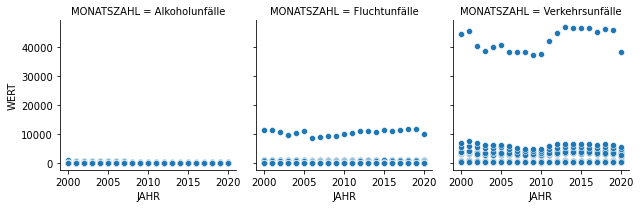

In [5]:
g = sns.FacetGrid(df, col="MONATSZAHL")

g.map(sns.scatterplot, "JAHR", "WERT")

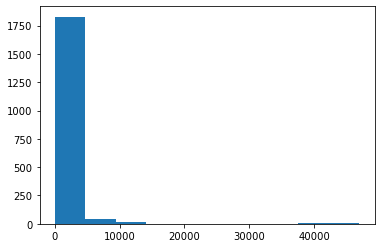

In [8]:
plt.hist("WERT", data=df)
plt.show()